##Principal Component Analysis (PCA) – Wine Dataset

## 1. What is Principal Component Analysis?

Principal Component Analysis (PCA) is an **unsupervised dimensionality reduction technique** used to reduce the number of features in a dataset while preserving as much variance as possible.

PCA works by:
- Transforming the original features into a new set of orthogonal variables called **principal components**
- Each principal component is a linear combination of the original features
- Components are ordered by the amount of variance they explain

### Why PCA?
- Reduces dimensionality
- Eliminates correlated features
- Improves visualization and interpretability
- Often used as a preprocessing step for machine learning models

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


## 2. Dataset Description

The **Wine dataset** contains physicochemical measurements of wines derived from three different cultivars.

### Features (13 total):
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315
- Proline

### Target (for reference only):
- Wine class (used only for visualization, PCA itself is unsupervised)

This dataset is suitable for PCA because it contains:
- Multiple numeric features
- Correlated variables
- A dimensionality high enough to benefit from reduction


In [2]:
# Load wine dataset
wine = load_wine()

# Create DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 3. Exploratory Overview

Before applying PCA, we inspect:
- Dataset shape
- Feature scales
- Whether standardization is required

PCA is sensitive to feature scales, so preprocessing is critical.


In [3]:
print("Dataset shape:", df.shape)
df.describe()


Dataset shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 4. Feature Scaling

PCA relies on variance to identify important components.
If features are on different scales, those with larger magnitudes dominate the results.

Therefore, **standardization** is required so that:
- Each feature has mean = 0
- Standard deviation = 1


In [4]:
# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5. Applying Principal Component Analysis

PCA is applied to the standardized data to:
- Identify principal components
- Reduce dimensionality
- Measure variance explained by each component


In [5]:
# Initialize PCA (no. of components not specified yet)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


## 6. Explained Variance Ratio

The explained variance ratio indicates how much information (variance) each principal component captures.

This helps decide:
- How many components to retain
- The tradeoff between dimensionality and information loss


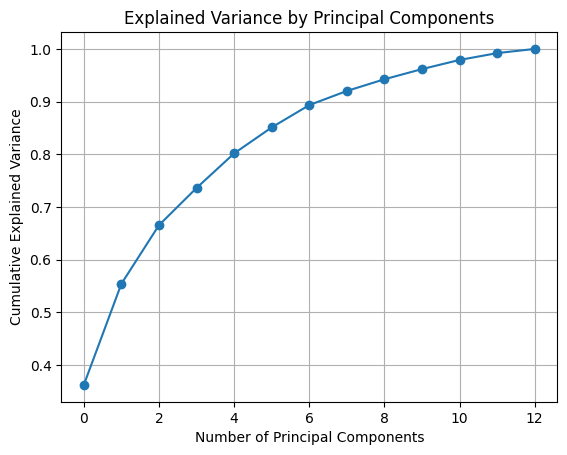

In [6]:
explained_variance = pca.explained_variance_ratio_

plt.figure()
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()


## 7. Dimensionality Reduction

Based on the explained variance plot, we select the number of components that capture most of the variance.

Here, we reduce the dataset to **2 principal components** for visualization.


In [7]:
# Reduce to 2 principal components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print("Reduced shape:", X_pca_2.shape)


Reduced shape: (178, 2)


## 8. PCA Visualization

The dataset is visualized in the reduced 2D PCA space.
Although PCA does not use class labels, we color the points by wine class to observe natural separation.


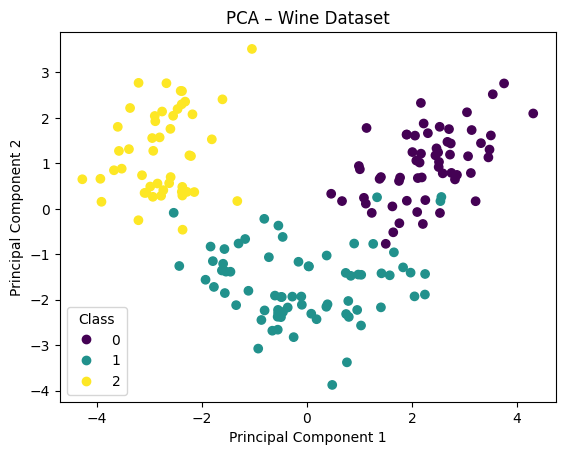

In [8]:
plt.figure()
scatter = plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=y
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA – Wine Dataset")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()


## 9. Interpretation of Principal Components

Principal components are combinations of original features.
By examining component loadings, we can understand which features contribute most to each component.


In [9]:
loadings = pd.DataFrame(
    pca_2.components_,
    columns=X.columns,
    index=['PC1', 'PC2']
)

loadings


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903


## Conclusion

In this notebook, Principal Component Analysis was applied to reduce the dimensionality of the Wine dataset.

Key outcomes:
- PCA successfully reduced 13 features to 2 components
- Most variance was preserved
- Clear structure emerged in the reduced feature space
- PCA proved effective for dimensionality reduction and data exploration

PCA is a powerful unsupervised technique commonly used for preprocessing, visualization, and noise reduction.
